In [1]:
from sklearn.datasets import samples_generator
from matplotlib import pyplot as plt
from IPython import display
import numpy as np
import time
%matplotlib inline

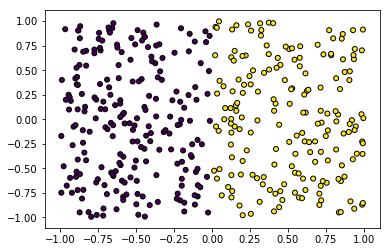

In [46]:
n_points = 400
margin =0.02
np.random.seed(2)
X1 = np.random.rand(n_points,2, )
X1 = 2*(X1-0.5)
X1 = np.array([[(1-x+margin/2)/(1+margin/2), y] if np.sign(x)== 1 else [1*(-1-x-margin/2)/(1+margin/2), y] for (x, y) in zip(X1[:,0], X1[:,1])])
Y1 = [np.sign(x) for x in X1[:,0]]
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c= Y1,
            s=25, edgecolor='k')

In [47]:
# X1, Y1 = samples_generator.make_classification(n_samples=101, n_features=2, n_redundant=0, n_informative=1, 
#                                       n_clusters_per_class=1, class_sep=1.5, random_state=1, flip_y = 0);
# X1[:,0] = X1[:,0]*0.5
# plt.figure(figsize=(5, 5))

# plt.title("One informative feature, one cluster per class", fontsize='small')
# plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
#             s=25, edgecolor='k')
# Y1 = np.sign(Y1-0.5)

In [48]:
resolution = 20
x1_min, x1_max = X1[:, 0].min(), X1[:, 0].max()
x2_min, x2_max = X1[:, 1].min(), X1[:, 1].max()
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, resolution), np.linspace(x2_min, x2_max, resolution))
grid = (np.array([xx1.ravel(), xx2.ravel()])).T

In [40]:
def perceptron(X, Y):
    dim = X.shape[1]
    w = np.zeros(dim)
    error_arr = []
    for i in range(10):
        for x, y  in zip(X, Y):
            if np.dot(x, w)*y >0:
                pass
            else:
                w = w + x*y;
                error  = ((np.dot(X, w)*Y)<0).sum()/X.shape[0]
                resp = np.sign(np.dot(grid, w))
                Z = resp.reshape(xx1.shape)
                display.display(plt.gcf())
                display.clear_output(wait=True)
                time.sleep(0.0)
                plt.contourf(xx1, xx2, Z, alpha=1)
                plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1, s=25, edgecolor='k')
                plt.title("Error: {}".format(error), fontsize='small')
                error_arr.append(error)

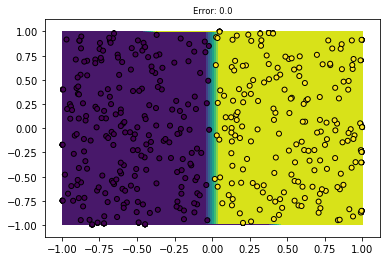

In [41]:
perceptron(X1, Y1)

In [112]:
def perceptron2(X, Y):
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(7,7))
    dim = X.shape[1]
    w = np.zeros(dim)
    update = 0
    error_arr = []
    w_alingment = []
    w_star = [1,0]
    w_norm = []
    plt_range = (-1,1)
    for i in range(20):
        for x, y  in zip(X, Y):
            if np.dot(x, w)*y >0:
                pass
            else:
                update = update +1
                w = w + x*y;
                error  = ((np.dot(X, w)*Y)<0).sum()/X.shape[0]
                resp = np.sign(np.dot(grid, w))
                error_arr.append(error)
                w_alingment.append(np.dot(w_star,w))
                w_norm.append(np.dot(w_star,w)/np.sqrt(np.dot(w,w)))
                Z = resp.reshape(xx1.shape)
                ax1.cla()
                ax2.cla()
                ax3.cla()
                ax4.cla()
                ax1.set_xlim(plt_range)
                ax1.set_ylim(plt_range)
                ax2.set_ylim(0,0.3)
                ax1.contourf(xx1, xx2, Z)
                ax1.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1, s=25, edgecolor='k')
                ax1.set_title("w1 = {:.2f}, w2 = {:.2f}".format(w[0], w[1]), fontsize='small')
                ax2.set_title("Error {:.2f}".format(error), fontsize='small')
                ax3.set_title(r'$w \cdot \widehat{w}$', fontsize='medium')
                ax4.set_title(r'$w \cdot \widehat{w} / \|\| w\|\|$', fontsize='medium')
                ax1.plot([0,w[0]],[0,w[1]], linewidth=5)
                ax2.plot(error_arr, c = 'r')
                ax3.plot(w_alingment)
                ax4.plot(w_norm)
                display.display(plt.gcf())
                display.clear_output(wait=True)
    print("Perceptron coveraged after {} upates".format(update))
    print("Theortetical upper limit of runs is 1/Gamma^2 = {:.0f}".format(1/margin**2))


Perceptron coveraged after 15 upates
Theortetical upper limit of runs is 1/Gamma^2 = 2500


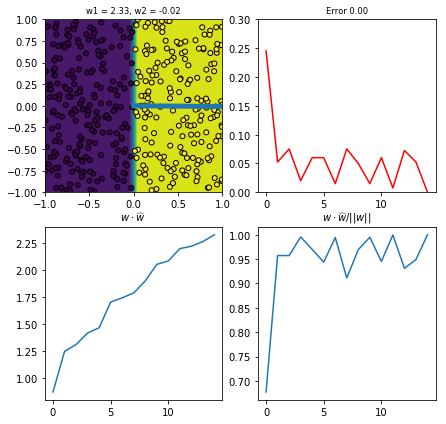

In [113]:
perceptron2(X1, Y1)

Reference A course of Machine learning, Dume: page: 50
and Understanding machine learning from ..., page 111